In [83]:
exec(open('/home/jovyan/personal/Ray/setup_env.py').read())
exec(open('/home/jovyan/personal/Ray/Access Logs/logs_exploratory3.py').read())
results2

Snowflake password:


 ·········


client      env                  moduleid         day   tpt_mean  \
0     voya  staging  5e418e8a3605d5020e31d7fe  2020-02-13   0.040600   
1     voya  staging  5e418e8a3605d5020e31d7fe  2020-02-14   0.049625   
2     voya  staging  5e418e8a3605d5020e31d7fe  2020-02-15   0.052667   
3     voya  staging  5e418e8a3605d5020e31d7fe  2020-02-18   0.074923   
4     voya  staging  5e418e8a3605d5020e31d7fe  2020-02-19   0.064000   
..     ...      ...                       ...         ...        ...   
188   voya  staging  5e418e8a3605d5020e31d7fe  2021-07-16   1.755000   
189   voya  staging  5e418e8a3605d5020e31d7fe  2021-07-21   6.174292   
190   voya  staging  5e418e8a3605d5020e31d7fe  2021-07-28   1.987000   
191   voya  staging  5e418e8a3605d5020e31d7fe  2021-07-29  19.385000   
192   voya  staging  5e418e8a3605d5020e31d7fe  2021-07-30   0.418250   

     tpt_size     sc_mean       sb_mean  env_sizeup  tpt_size_sq  \
0           5   82.200000   3543.200000           0           25   
1           8   95.000000   3658.500000           0           64   
2           3   99.000000   3810.333333           0            9   
3          13  127.538462   7762.923077           0          169   
4           5  137.800000   6528.400000           0           25   
..        ...         ...           ...         ...          ...   
188         3  866.000000   1311.333333           0            9   
189        24  866.000000   4659.250000           0          576   
190         3  866.000000  77684.666667           0            9   
191         3  866.000000  71244.333333           0            9   
192         4  866.000000   2195.500000           0           16   

     tpt_size_sqrt     sc_mean_sq  sc_mean_sqrt    sb_mean_sq  sb_mean_sqrt  \
0         2.236068    6756.840000      9.066422  1.255427e+07     59.524785   
1         2.828427    9025.000000      9.746794  1.338462e+07     60.485535   
2         1.732051    9801.000000      9.949874  1.451864e+07     61.727898   
3         3.605551   16266.059289     11.293293  6.026297e+07     88.107452   
4         2.236068   18988.840000     11.738824  4.262001e+07     80.798515   
..             ...            ...           ...           ...           ...   
188       1.732051  749956.000000     29.427878  1.719595e+06     36.212337   
189       4.898979  749956.000000     29.427878  2.170861e+07     68.258699   
190       1.732051  749956.000000     29.427878  6.034907e+09    278.719692   
191       1.732051  749956.000000     29.427878  5.075755e+09    266.916341   
192       2.000000  749956.000000     29.427878  4.820220e+06     46.856163   

     env_upsize      yhat       iv_u      iv_l  reg_outlier  
0             0  1.243036   5.847506 -3.361434            0  
1             0  0.898298   5.318297 -3.521700            0  
2             0  0.479460   4.871339 -3.912418            0  
3             0  0.000000   3.889764 -4.558138            0  
4             0  0.000000   3.641877 -4.740094            0  
..          ...       ...        ...       ...          ...  
188           0  6.900860  11.058738  2.742983            0  
189           0  6.186563  10.393195  1.979932            0  
190           0  6.933695  11.236279  2.631112            0  
191           0  6.742327  11.037848  2.446806            1  
192           0  6.672143  10.832592  2.511694            0  

[193 rows x 20 columns]

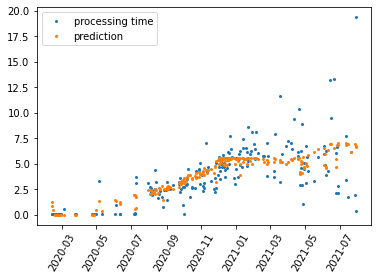

In [86]:
#plt.plot(results2.day,results2.sc_mean, marker='o', linestyle='', ms=2, label='submissions')
plt.plot(results2.day,results2.tpt_mean, marker='o', linestyle='', ms=2, label='processing time')
plt.plot(results2.day,results2.yhat, marker='o', linestyle='', ms=2, label='prediction')
for line in results2.loc[results2.env_upsize==1].day:
    plt.axvline(x=line, color='k', label='upsize')
plt.xticks(rotation=60)
plt.legend()
plt.show()

In [85]:
reg.summary()
#plt.hist(results.loc[results.time <= datetime(2020,11,20)].tpt_mean)
#results2.loc[(results2.day >= datetime(2020,11,15))].head(30)
#results2.loc[results2.env_upsize==1]

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               tpt_mean   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     19.22
Date:                Mon, 02 Aug 2021   Prob (F-statistic):           2.09e-22
Time:                        14:46:04   Log-Likelihood:                -405.82
No. Observations:                 193   AIC:                             831.6
Df Residuals:                     183   BIC:                             864.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        14.9209      7.457      2.001      0.047       0.207      29.635
tpt_size         -0.0866      0.201     -0.430      0.667      -0.483       0.310
sc_mean           0.0831      0.041      2.004      0.047       0.001       0.165
sb_mean           0.0002      0.000      1.039      0.300      -0.000       0.001
env_upsize    -7.103e-13   3.59e-13     -1.980      0.049   -1.42e-12   -2.68e-15
tpt_size_sq      -0.0002      0.002     -0.113      0.910      -0.004       0.004
tpt_size_sqrt     0.6538      0.922      0.709      0.479      -1.165       2.473
sc_mean_sq     -2.21e-05   1.59e-05     -1.391      0.166   -5.34e-05    9.24e-06
sc_mean_sqrt     -2.1368      1.078     -1.982      0.049      -4.264      -0.009
sb_mean_sq    -4.252e-10   8.97e-10     -0.474      0.636   -2.19e-09    1.34e-09
sb_mean_sqrt     -0.0440      0.031     -1.439      0.152      -0.104       0.016
==============================================================================
Omnibus:                       88.539   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              795.594
Skew:                           1.472   Prob(JB):                    1.73e-173
Kurtosis:                      12.501   Cond. No.                     5.23e+23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.27e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

count      mean       std    min    25%    50%       75%     max
reg_outlier                                                                  
0            182.0  0.220473  0.568570  0.009  0.024  0.030   0.06650   2.880
1             14.0  9.833571  3.975993  4.807  5.819  9.618  12.71425  15.933

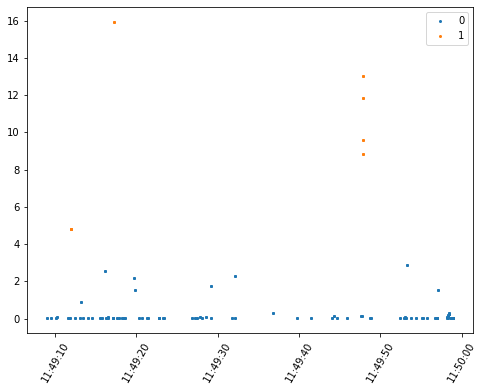

In [5]:

K = random.randint(0,23)
time1 = results.time.min() + timedelta(hours=K)
time2 = results.time.min() + timedelta(hours=K) + timedelta(minutes=10)

or_pks = list(results2.loc[results2.ro_outlier==1].pk)

#chart = results.loc[(results.time >= time1) & (results.time < time2)]
chart = results.loc[results.pk==or_pks[0]]
group_var = ['reg_outlier']
groups = chart.groupby(group_var)
x = 'time'
y = 'target_processing_time'
#z = chart.yhat
fig, ax = plt.subplots(figsize=(8,6))
for name, group in groups:
    ax.plot(group[x], group[y], marker='o', linestyle='', ms=2, label=name)
#ax.plot(x, y, 'o', label="data")
#ax.plot(x, z, 'r--.', label="OLS")
#ax.plot(x, chart.iv_u, 'r--')
#ax.plot(x, chart.iv_l, 'r--')
plt.xticks(rotation=60)
ax.legend(loc='best')
str(chart.date.min())
chart[['client','env','target_name','time','target_processing_time','total_count','yhat','tpt_size','iv_u']]
chart.groupby('reg_outlier').target_processing_time.describe()

count       mean       std     min     25%     50%       75%  \
reg_outlier                                                                 
0            336.0   0.456917  0.974642   0.009   0.015   0.017   0.20275   
1            420.0  15.743419  1.881494  12.588  14.260  15.435  17.14100   

                max  
reg_outlier          
0             3.850  
1            19.353

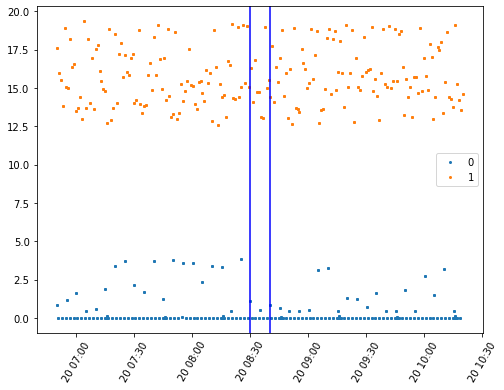

In [10]:
#chart_funct(or_pks[1])
results3 = results.loc[results.pk==or_pks[0]].copy()
"""
results3['client_size'] = results3.groupby('client').target_processing_time.transform('size')
results3 = results3.loc[results3.client_size >= 10]
results3['tpt_client_mean'] = results3.groupby('client').target_processing_time.transform('mean')
results3.groupby('client').target_processing_time.describe().reset_index()
results4 = results3.loc[results3.tpt_client_mean==results]
"""
results4 = results3.groupby(['client','pk']).reg_outlier.describe().reset_index()
results4 = results4.loc[(results4['count'] > 10)]
results4 = results4.loc[results4['mean'] == results4['mean'].max()].reset_index().drop('index',axis=1)
issue_client = results4.client[0]
issue_pk = results4.pk[0]
chart = results.loc[(results.client==issue_client) & (results.pk >= issue_pk -10) & (results.pk <= issue_pk +10)].copy()
group_var = ['reg_outlier']
groups = chart.groupby(group_var)
x = 'time'
y = 'target_processing_time'
fig, ax = plt.subplots(figsize=(8,6))
for name, group in groups:
    ax.plot(group[x], group[y], marker='o', linestyle='', ms=2, label=name)
plt.xticks(rotation=60)
plt.axvline(x=chart.loc[chart.pk==issue_pk].time.min(),color='b')
plt.axvline(x=chart.loc[chart.pk==issue_pk+1].time.min(),color='b')
ax.legend(loc='best')
str(chart.date.min())
chart[['client','env','target_name','time','target_processing_time','total_count','yhat','tpt_size','iv_u']]
chart.groupby('reg_outlier').target_processing_time.describe()

In [12]:
chart[['client','elb','target_name','time','request_uri','request_method','sent_bytes','received_bytes','target_processing_time']].head(30)

client                                             elb  \
454113  ssgm-qa  app/awseb-AWSEB-1V546ZWE9YLEX/fb000bbc551f2068   
454112  ssgm-qa  app/awseb-AWSEB-1V546ZWE9YLEX/fb000bbc551f2068   
454125  ssgm-qa  app/awseb-AWSEB-1V546ZWE9YLEX/fb000bbc551f2068   
454124  ssgm-qa  app/awseb-AWSEB-1V546ZWE9YLEX/fb000bbc551f2068   
454176  ssgm-qa  app/awseb-AWSEB-1V546ZWE9YLEX/fb000bbc551f2068   
454177  ssgm-qa  app/awseb-AWSEB-1V546ZWE9YLEX/fb000bbc551f2068   
454212  ssgm-qa  app/awseb-AWSEB-1V546ZWE9YLEX/fb000bbc551f2068   
454213  ssgm-qa  app/awseb-AWSEB-1V546ZWE9YLEX/fb000bbc551f2068   
454667  ssgm-qa  app/awseb-AWSEB-1V546ZWE9YLEX/fb000bbc551f2068   
454666  ssgm-qa  app/awseb-AWSEB-1V546ZWE9YLEX/fb000bbc551f2068   
454793  ssgm-qa  app/awseb-AWSEB-1V546ZWE9YLEX/fb000bbc551f2068   
454792  ssgm-qa  app/awseb-AWSEB-1V546ZWE9YLEX/fb000bbc551f2068   
454819  ssgm-qa  app/awseb-AWSEB-1V546ZWE9YLEX/fb000bbc551f2068   
454818  ssgm-qa  app/awseb-AWSEB-1V546ZWE9YLEX/fb000bbc551f2068   
454921  ssgm-qa  app/awseb-AWSEB-1V546ZWE9YLEX/fb000bbc551f2068   
454920  ssgm-qa  app/awseb-AWSEB-1V546ZWE9YLEX/fb000bbc551f2068   
454962  ssgm-qa  app/awseb-AWSEB-1V546ZWE9YLEX/fb000bbc551f2068   
454963  ssgm-qa  app/awseb-AWSEB-1V546ZWE9YLEX/fb000bbc551f2068   
454996  ssgm-qa  app/awseb-AWSEB-1V546ZWE9YLEX/fb000bbc551f2068   
454997  ssgm-qa  app/awseb-AWSEB-1V546ZWE9YLEX/fb000bbc551f2068   
455011  ssgm-qa  app/awseb-AWSEB-1V546ZWE9YLEX/fb000bbc551f2068   
455010  ssgm-qa  app/awseb-AWSEB-1V546ZWE9YLEX/fb000bbc551f2068   
455102  ssgm-qa  app/awseb-AWSEB-1V546ZWE9YLEX/fb000bbc551f2068   
455103  ssgm-qa  app/awseb-AWSEB-1V546ZWE9YLEX/fb000bbc551f2068   
455306  ssgm-qa  app/awseb-AWSEB-1V546ZWE9YLEX/fb000bbc551f2068   
455307  ssgm-qa  app/awseb-AWSEB-1V546ZWE9YLEX/fb000bbc551f2068   
455579  ssgm-qa  app/awseb-AWSEB-1V546ZWE9YLEX/fb000bbc551f2068   
455578  ssgm-qa  app/awseb-AWSEB-1V546ZWE9YLEX/fb000bbc551f2068   
455688  ssgm-qa  app/awseb-AWSEB-1V546ZWE9YLEX/fb000bbc551f2068   
455689  ssgm-qa  app/awseb-AWSEB-1V546ZWE9YLEX/fb000bbc551f2068   

          target_name                       time  \
454113   172.29.13.16 2021-05-20 06:50:02.205798   
454112   172.29.13.16 2021-05-20 06:50:02.205798   
454125   172.29.13.16 2021-05-20 06:50:07.382350   
454124   172.29.13.16 2021-05-20 06:50:07.382350   
454176  172.29.13.171 2021-05-20 06:50:40.453146   
454177  172.29.13.171 2021-05-20 06:50:40.453146   
454212  172.29.13.171 2021-05-20 06:51:01.002379   
454213  172.29.13.171 2021-05-20 06:51:01.002379   
454667   172.29.13.16 2021-05-20 06:52:00.922811   
454666   172.29.13.16 2021-05-20 06:52:00.922811   
454793   172.29.13.16 2021-05-20 06:52:40.846783   
454792   172.29.13.16 2021-05-20 06:52:40.846783   
454819  172.29.13.171 2021-05-20 06:52:59.038234   
454818  172.29.13.171 2021-05-20 06:52:59.038234   
454921  172.29.13.171 2021-05-20 06:54:04.236158   
454920  172.29.13.171 2021-05-20 06:54:04.236158   
454962   172.29.13.16 2021-05-20 06:54:40.550288   
454963   172.29.13.16 2021-05-20 06:54:40.550288   
454996  172.29.13.171 2021-05-20 06:55:00.551679   
454997  172.29.13.171 2021-05-20 06:55:00.551679   
455011  172.29.13.171 2021-05-20 06:55:07.775584   
455010  172.29.13.171 2021-05-20 06:55:07.775584   
455102  172.29.13.171 2021-05-20 06:56:00.594710   
455103  172.29.13.171 2021-05-20 06:56:00.594710   
455306  172.29.13.171 2021-05-20 06:56:40.594220   
455307  172.29.13.171 2021-05-20 06:56:40.594220   
455579   172.29.13.16 2021-05-20 06:57:04.750367   
455578   172.29.13.16 2021-05-20 06:57:04.750367   
455688   172.29.13.16 2021-05-20 06:58:02.906366   
455689   172.29.13.16 2021-05-20 06:58:02.906366   

                                              request_uri request_method  \
454113  /fbu/uapi/system/getSubmissions?created%3E2020...            GET   
454112  /fbu/uapi/system/getSubmissions?created%3E2020...            GET   
454125  /fbu/uapi/system/getSubmissions?created%3E2020...            GET   
454124  /fbu/u

In [15]:
#list(chart.request_uri[0:10])
chart['recBytesCheck'] = np.where(chart.received_bytes==1685,'Yes','No')
chart.groupby('recBytesCheck').target_processing_time.describe()
print(list(chart.loc[chart.recBytesCheck=='Yes'].request_uri)[0])
print(list(chart.loc[chart.recBytesCheck=='No'].request_uri)[0])

/fbu/uapi/system/getSubmissions?created%3E2020-11-23T00%3A00%3A00.000Z=&sort=created&moduleId=5f3aefe5b3e95c09bc2eec41&fields=sourceName%2Cmessage%2CbatchId&limit=50&metadataFields=checkpoints&metadataFilter=%7B%22checkpoints.checkptLoaded%22%3A%7B%22%24exists%22%3Atrue%7D%2C%22checkpoints.checkptInProgress%22%3A%7B%22%24exists%22%3Afalse%7D%2C%22checkpoints.checkptCompleted%22%3A%7B%22%24exists%22%3Afalse%7D%7D
/fbu/uapi/system/getSubmissions?created%3E2020-12-31T11%3A37%3A29.806Z=&sort=created&moduleId=5f6a9df52aafe602497933e5&fields=sourceName%2Cmessage%2CbatchId&limit=5&metadataFields=checkpoints&metadataFilter=%7B%22checkpoints.checkptLoaded%22%3A%7B%22%24exists%22%3Atrue%7D%2C%22checkpoints.checkptInProgress%22%3A%7B%22%24exists%22%3Afalse%7D%2C%22checkpoints.checkptCompleted%22%3A%7B%22%24exists%22%3Afalse%7D%7D


In [56]:
byte_list = list(chart.received_bytes.unique())
byte_list2 = [(x,y) for x in byte_list for y in byte_list if x!=y]

for x,y in byte_list2:
    welch = stats.ttest_ind(chart.loc[chart.received_bytes==x].target_processing_time,chart.loc[chart.received_bytes==y].target_processing_time,equal_var=False)
    print(x,y,welch)


1728 1685 Ttest_indResult(statistic=-63.283640161163255, pvalue=8.472675553959875e-80)
1728 2273 Ttest_indResult(statistic=9.934667287695456, pvalue=1.7778714712546912e-12)
1728 1707 Ttest_indResult(statistic=9.946109968981267, pvalue=1.7172577643941303e-12)
1728 1983 Ttest_indResult(statistic=9.443477925629907, pvalue=7.59023944305883e-12)
1685 1728 Ttest_indResult(statistic=63.283640161163255, pvalue=8.472675553959875e-80)
1685 2273 Ttest_indResult(statistic=117.80221001589764, pvalue=2.241751434632179e-192)
1685 1707 Ttest_indResult(statistic=117.81287750649206, pvalue=2.08515279834689e-192)
1685 1983 Ttest_indResult(statistic=117.10854019138597, pvalue=4.315460697605298e-192)
2273 1728 Ttest_indResult(statistic=-9.934667287695456, pvalue=1.7778714712546912e-12)
2273 1685 Ttest_indResult(statistic=-117.80221001589764, pvalue=2.241751434632179e-192)
2273 1707 Ttest_indResult(statistic=1.6054312607284373, pvalue=0.12948028358661012)
2273 1983 Ttest_indResult(statistic=-22.075055589012

In [63]:
chart['moduleId'] = chart.request_uri.apply(lambda x: re.sub('.*moduleId=','',re.match('.*moduleId=[0-9a-z]*',x).group(0)))
chart['limit_check'] = np.where(chart.request_uri.apply(lambda x: re.search('.*limit=[0-9]*',x)),True,False)
chart['date_check'] = np.where(chart.request_uri.apply(lambda x: re.search('.*created.*[0-9]{3}Z',x)),True,False)
chart['moduleId'] = chart.request_uri.apply(lambda x: re.sub('.*moduleId=','',re.match('.*moduleId=[0-9a-z]*',x).group(0)))
chart.loc[chart.limit_check==True,'date_constraint'] = chart.loc[chart.date_check==True].request_uri.apply(lambda x: re.sub('.*created%3E','',re.match('.*created.*[0-9]{3}Z',x).group(0)))
chart.groupby('limit_check').size()
chart.loc[chart.limit_check==True,'limit_rows'] =  chart.loc[chart.limit_check==True].request_uri.apply(lambda x: re.sub('.*limit=','',re.match('.*limit=[0-9]*',x).group(0)))
chart.groupby(['moduleId','limit_check']).agg({'limit_rows':'describe','target_processing_time':'mean'}).reset_index()

moduleId limit_check limit_rows                     \
                                             count unique    top freq   
0  5e6a7407013d97020f4d2add       False         14      1  False   14   
1  5e74fd6fa0931a020f8e3d5e       False         14      1  False   14   
2  5e7bb5e1d7c4360213d36d6e       False         14      1  False   14   
3  5f2453461dc28e368dbfd9dd        True        210      1      1  210   
4  5f3aefe5b3e95c09bc2eec41        True        420      1     50  420   
5  5f6a9df52aafe602497933e5        True         84      1      5   84   

  target_processing_time  
  target_processing_time  
0               0.100000  
1               0.011000  
2               0.018143  
3               0.016095  
4              15.743419  
5               1.765905

In [58]:
#print(chart.time.min(),chart.time.max())
#chart.loc[chart.moduleId=='5f3aefe5b3e95c09bc2eec41'].head(30).time
chart.groupby(['moduleId','date_check']).date_constraint.describe()

count unique  \
moduleId                 date_check                
5e6a7407013d97020f4d2add False          0      0   
5e74fd6fa0931a020f8e3d5e False          0      0   
5e7bb5e1d7c4360213d36d6e False          0      0   
5f2453461dc28e368dbfd9dd False          0      0   
5f3aefe5b3e95c09bc2eec41 True         420      1   
5f6a9df52aafe602497933e5 True          84      1   

                                                              top freq  
moduleId                 date_check                                     
5e6a7407013d97020f4d2add False                                NaN  NaN  
5e74fd6fa0931a020f8e3d5e False                                NaN  NaN  
5e7bb5e1d7c4360213d36d6e False                                NaN  NaN  
5f2453461dc28e368dbfd9dd False                                NaN  NaN  
5f3aefe5b3e95c09bc2eec41 True        2020-11-23T00%3A00%3A00.000Z  420  
5f6a9df52aafe602497933e5 True        2020-12-31T11%3A37%3A29.806Z   84

In [60]:
list(chart.loc[chart.moduleId=='5e7bb5e1d7c4360213d36d6e'].request_uri)[0]

'/fbu/uapi/system/getSubmissions?filter=%7B%22%24and%22%3A%5B%7B%22%24and%22%3A%5B%7B%22data.status%22%3A%22Actioned%22%7D%2C%7B%22data.modifiedNum%22%3A%7B%22%24lte%22%3A20210520031548%7D%7D%5D%7D%2C%7B%22data.flagArchive%22%3A%22no%22%7D%5D%7D&moduleId=5e7bb5e1d7c4360213d36d6e&fields=flagArchive%2CtradeStatus%2CtransactionId%2CregionUnq%2CtradeDate%2CvalDate%2CbaseEquivAmount%2CbaseCurrency'